In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
D = pd.read_csv('data01.txt', sep='\t')
X = D[['x1','x2']]
X1 = D['x1']
X2 = D['x2']
y = D['y']

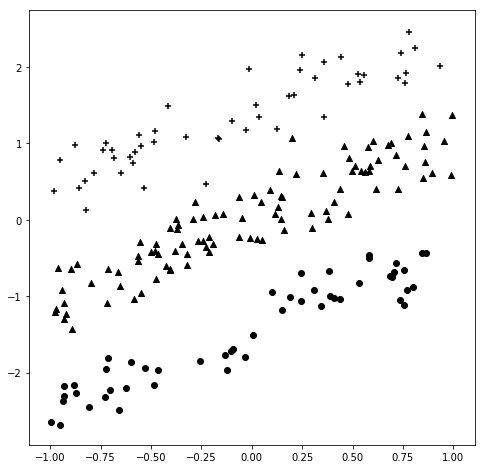

In [2]:
plt.figure(0, figsize=(8,8)).clf()
plt.scatter(X1.loc[y==1], X2[y==1], marker='o', c='k')
plt.scatter(X1.loc[y==2], X2[y==2], marker='^', c='k')
plt.scatter(X1.loc[y==3], X2[y==3], marker='+', c='k')
plt.show()

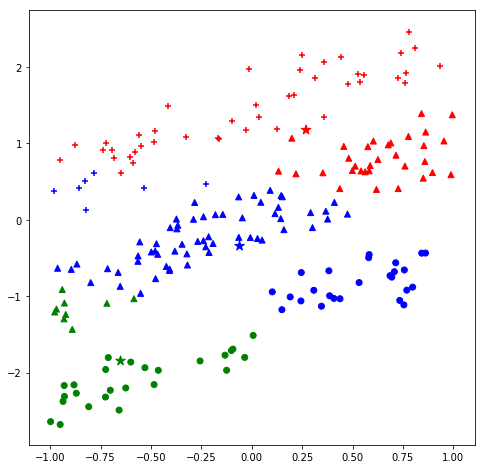

In [3]:
from sklearn.cluster import KMeans
random_state = 20180301
km = KMeans(n_clusters=3, random_state=random_state)
y_pred_km1 = km.fit_predict(X)
centers = km.cluster_centers_
# plt.scatter(X1, X2, c=y_pred_km1)
markers = 'o^+'
colors = 'rgbyk'
# plt.scatter(X1, X2, c=y_pred_km1)
plt.figure(0, figsize=(8,8)).clf()
for ci in range(1,4):
    plt.scatter(X1.loc[y==ci], X2[y==ci], marker=markers[ci-1], c=[colors[x] for x in y_pred_km1[y==ci]])
plt.scatter(centers[:,0], centers[:,1], s = 100, marker='*', c=colors)
plt.show()

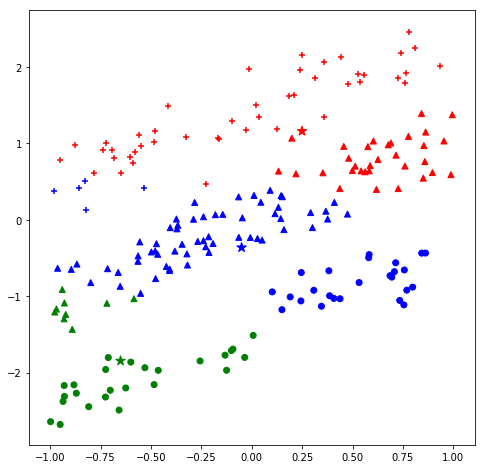

In [4]:
random_state = 20160301
km2 = KMeans(n_clusters=3, random_state=random_state)
y_pred_km2 = km2.fit_predict(X)
centers = km2.cluster_centers_
markers = 'o^+'
colors = 'rgbyk'
# plt.scatter(X1, X2, c=y_pred_km2)
plt.figure(0, figsize=(8,8)).clf()
for ci in range(1,4):
    plt.scatter(X1.loc[y==ci], X2[y==ci], marker=markers[ci-1], c=[colors[x] for x in y_pred_km2[y==ci]])
plt.scatter(centers[:,0], centers[:,1], s = 100, marker='*', c=colors)
plt.show()

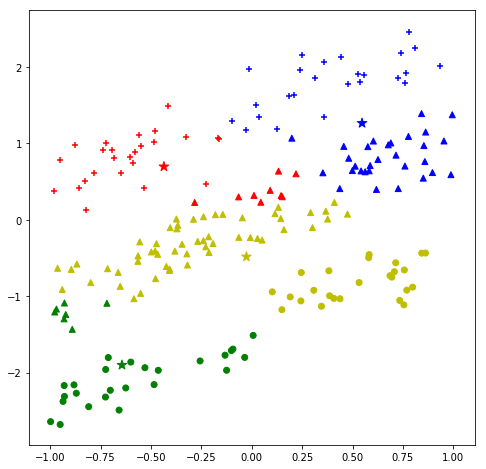

In [5]:
random_state = 20180301
km = KMeans(n_clusters=4, random_state=random_state)
y_pred_km3 = km.fit_predict(X)
centers = km.cluster_centers_
# plt.scatter(X1, X2, c=y_pred_km3)
markers = 'o^+'
colors = 'rgbyk'
plt.figure(0, figsize=(8,8)).clf()
for ci in range(1,4):
    plt.scatter(X1.loc[y==ci], X2[y==ci], marker=markers[ci-1], c=[colors[x] for x in y_pred_km3[y==ci]])
plt.scatter(centers[:,0], centers[:,1], s = 100, marker='*', c=colors)
plt.show()

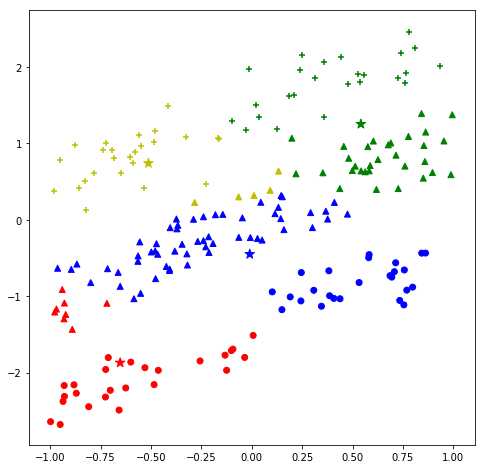

In [6]:
random_state = 20160301
km2 = KMeans(n_clusters=4, random_state=random_state)
y_pred_km4 = km2.fit_predict(X)
centers = km2.cluster_centers_
# plt.scatter(X1, X2, c=y_pred_km4)
markers = 'o^+'
colors = 'rgbyk'
plt.figure(0, figsize=(8,8)).clf()
for ci in range(1,4):
    plt.scatter(X1.loc[y==ci], X2[y==ci], marker=markers[ci-1], c=[colors[x] for x in y_pred_km4[y==ci]])
plt.scatter(centers[:,0], centers[:,1], s = 100, marker='*', c=colors)
plt.show()

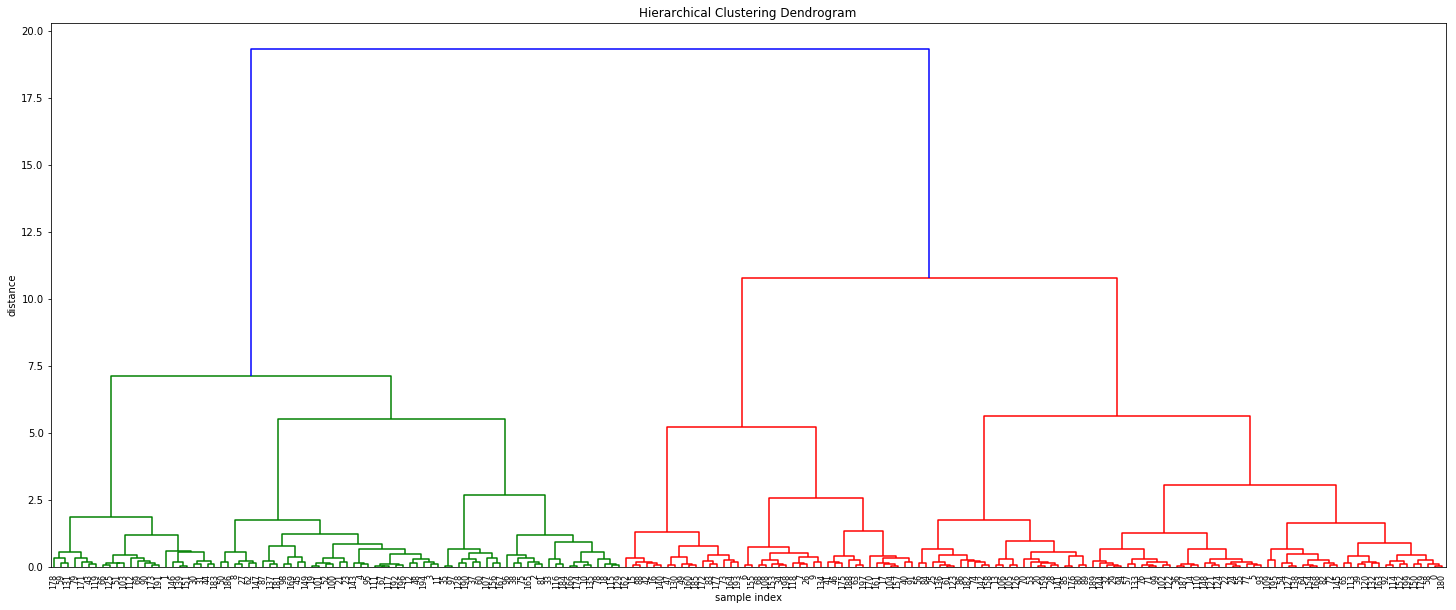

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
# 'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 
# 'ward' causes linkage() to use the Ward variance minimization algorithm.
Z = linkage(X, 'ward')
plt.figure(0, figsize=(25,10)).clf()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster
max_d = 10
y_pred_hac = fcluster(Z, max_d, criterion='distance')
y_pred_hac

array([3, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 3, 3, 2, 2, 2, 1, 1, 3, 1,
       3, 1, 3, 3, 2, 1, 3, 3, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 2, 3, 3,
       1, 1, 2, 1, 3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 1,
       2, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 3, 3, 1, 2, 3,
       3, 1, 1, 3, 3, 1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 1,
       3, 3, 2, 1, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 2,
       3, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 2,
       3, 2, 1, 3, 3, 1, 3, 1, 1, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 3, 1, 2,
       2, 3], dtype=int32)

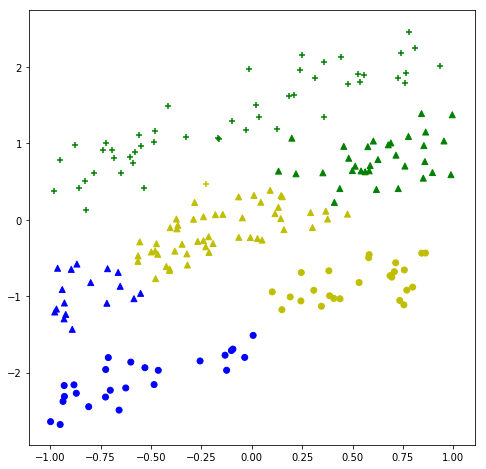

In [9]:
markers = 'o^+'
colors = 'rgbyk'
plt.figure(0, figsize=(8,8)).clf()
for ci in range(1,4):
    plt.scatter(X1.loc[y==ci], X2[y==ci], marker=markers[ci-1], c=[colors[x] for x in y_pred_hac[y==ci]])
plt.show()

In [10]:
from sklearn import metrics
# adjusted Rand index is a function that measures the similarity of the two assignments
print(metrics.adjusted_rand_score(y, y_pred_km1))
print(metrics.adjusted_rand_score(y, y_pred_hac))

0.2157496755475456
0.22822558801943174


In [11]:
# Two different normalized versions of this measure are available, Normalized Mutual Information(NMI) 
# and Adjusted Mutual Information(AMI). NMI is often used in the literature while AMI was proposed 
# more recently and is normalized against chance
print(metrics.adjusted_mutual_info_score(y, y_pred_km1))
print(metrics.adjusted_mutual_info_score(y, y_pred_hac))

print(metrics.normalized_mutual_info_score(y, y_pred_km1))
print(metrics.normalized_mutual_info_score(y, y_pred_hac))

0.28779857742975706
0.3294354474030597
0.296553010911762
0.33928063542249465
